# Complete EDA of Titanic Dataset
 

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

Dataset: https://www.kaggle.com/c/titanic/data

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Load Dataset

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [125]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 80

In [126]:
titanic = sns.load_dataset('titanic')

In [127]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [128]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [129]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Heatmap

In [131]:
plt.style.use('ggplot')

In [132]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

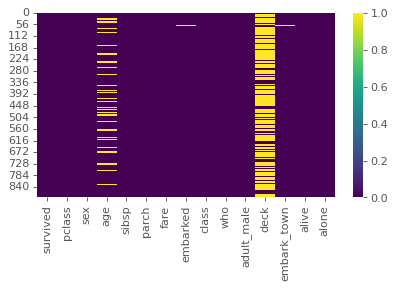

In [133]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True)

In [134]:
corrmat = titanic.corr(numeric_only = True)
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot: >

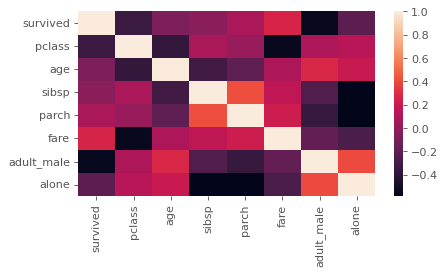

In [135]:
sns.heatmap(corrmat)

# Univariate Analysis 

In [136]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


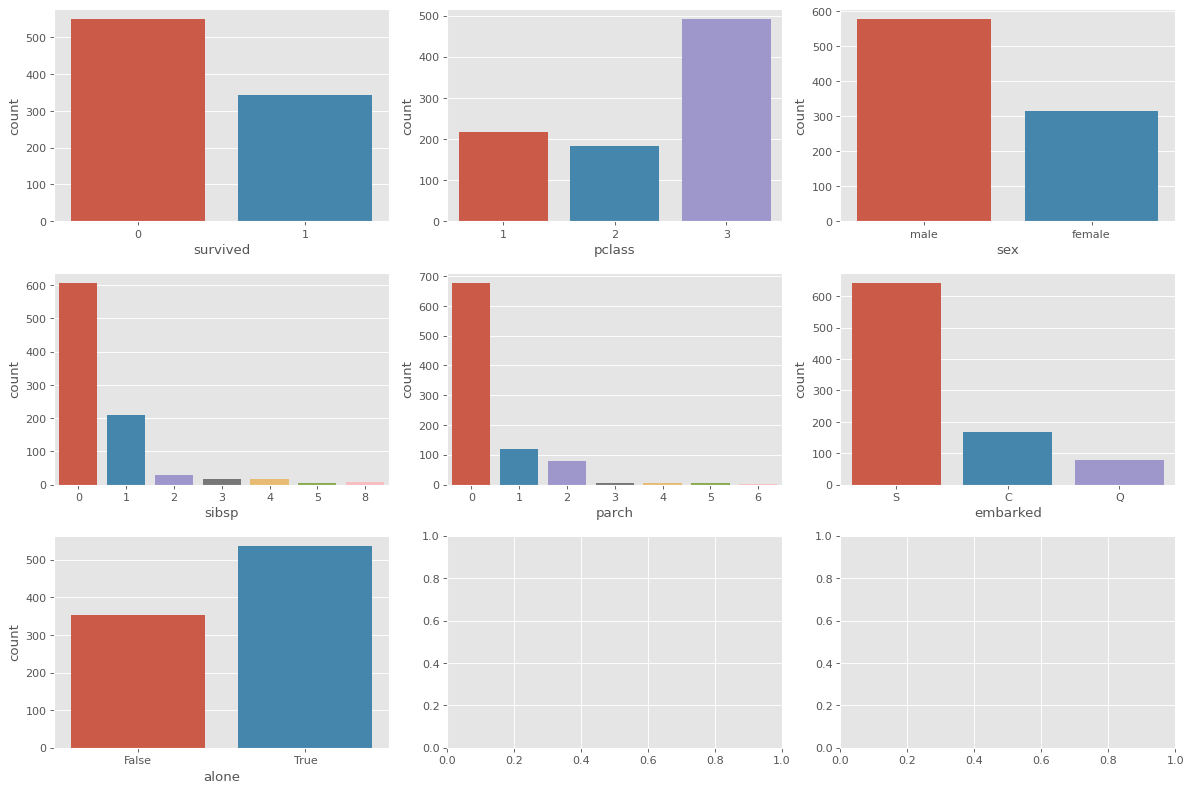

In [137]:

# create countplot for each categorical variable in the dataset using subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))


sns.countplot(x = 'survived', data = titanic, ax = axes[0][0])
sns.countplot(x = 'pclass', data = titanic, ax = axes[0][1])
sns.countplot(x = 'sex', data = titanic, ax = axes[0][2])
sns.countplot(x = 'sibsp', data = titanic, ax = axes[1][0])
sns.countplot(x = 'parch', data = titanic, ax = axes[1][1])
sns.countplot(x = 'embarked', data = titanic, ax = axes[1][2])
sns.countplot(x = 'alone', data = titanic, ax = axes[2][0])

plt.tight_layout()
plt.show()

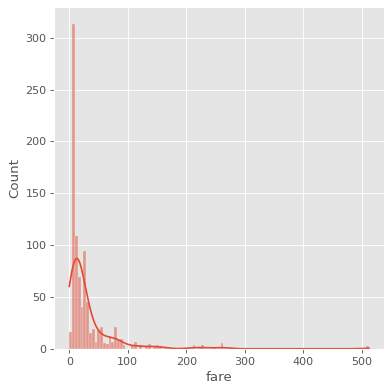

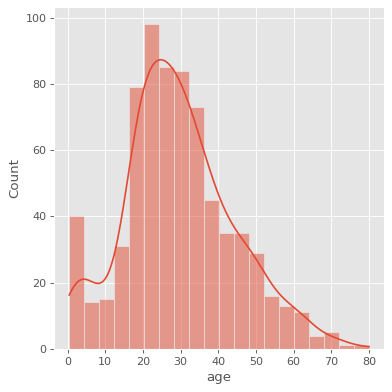

In [138]:

sns.displot(x = 'fare', data = titanic, kde = True)
sns.displot(x = 'age',data = titanic, kde = True)

plt.tight_layout()
plt.show()

# Survived

In [139]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

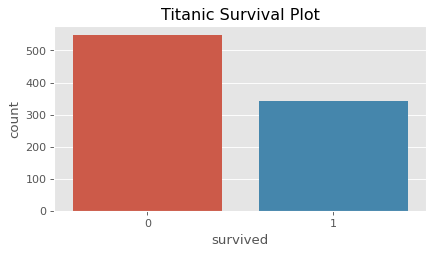

In [140]:
sns.countplot(x = 'survived', data = titanic)
plt.title('Titanic Survival Plot')
plt.show()

<AxesSubplot: ylabel='Frequency'>

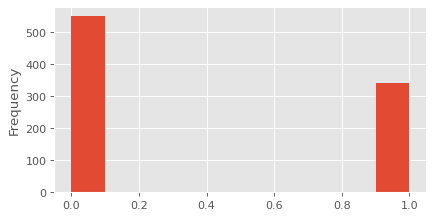

In [141]:
titanic['survived'].plot.hist()

<AxesSubplot: ylabel='survived'>

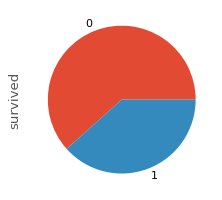

In [142]:
titanic['survived'].value_counts().plot.pie()

<AxesSubplot: ylabel='survived'>

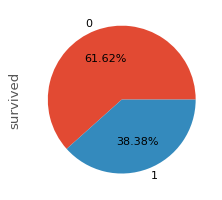

In [143]:
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

<AxesSubplot: ylabel='survived'>

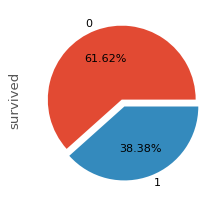

In [144]:
explode = [0, 0.1]
titanic['survived'].value_counts().plot.pie(explode = explode, autopct = '%1.2f%%')

# PClass

In [145]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [146]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

<AxesSubplot: xlabel='pclass', ylabel='count'>

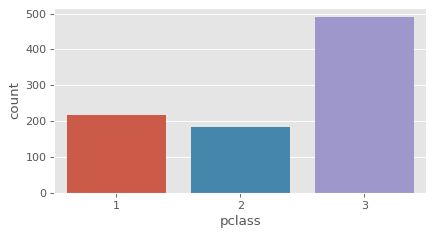

In [147]:
sns.countplot(x = 'pclass', data = titanic)

<AxesSubplot: xlabel='pclass', ylabel='count'>

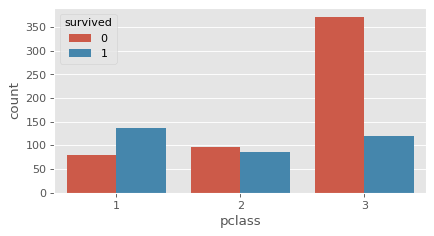

In [148]:
sns.countplot(x = 'pclass', data = titanic, hue = 'survived')

<AxesSubplot: ylabel='pclass'>

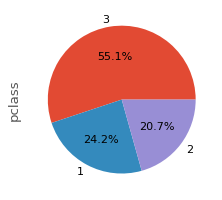

In [149]:
titanic['pclass'].value_counts().plot.pie(autopct = "%1.1f%%")

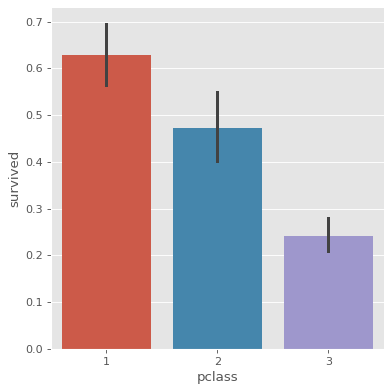

In [150]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic)

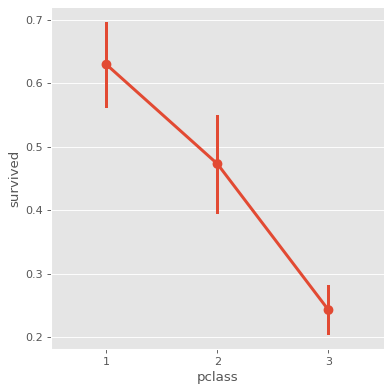

In [151]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic)

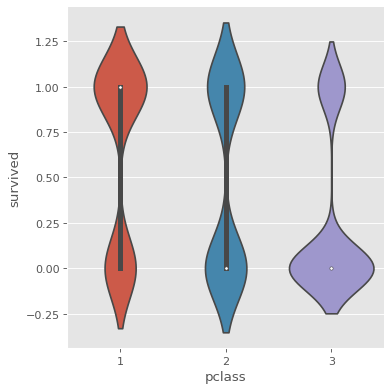

In [152]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'violin', data= titanic)

# Sex 

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [153]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [154]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

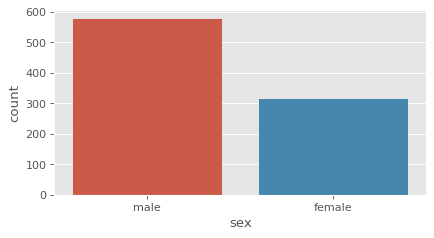

In [155]:
sns.countplot(x = 'sex', data = titanic)

<AxesSubplot: xlabel='sex', ylabel='count'>

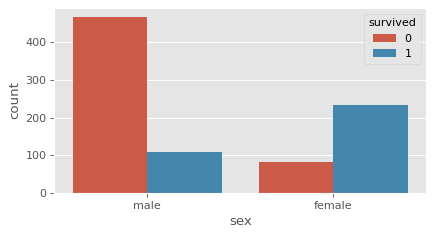

In [156]:
sns.countplot(x ='sex', data = titanic, hue = 'survived')

<AxesSubplot: ylabel='sex'>

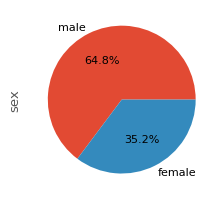

In [157]:
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f%%')

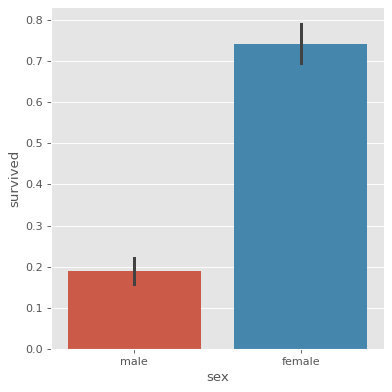

In [158]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic)

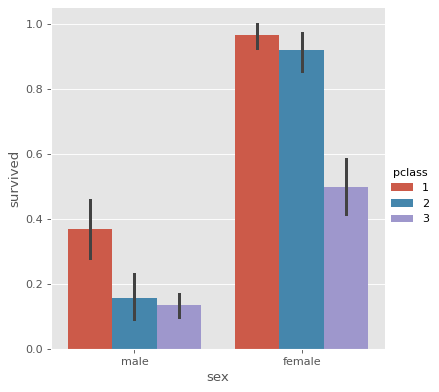

In [159]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')

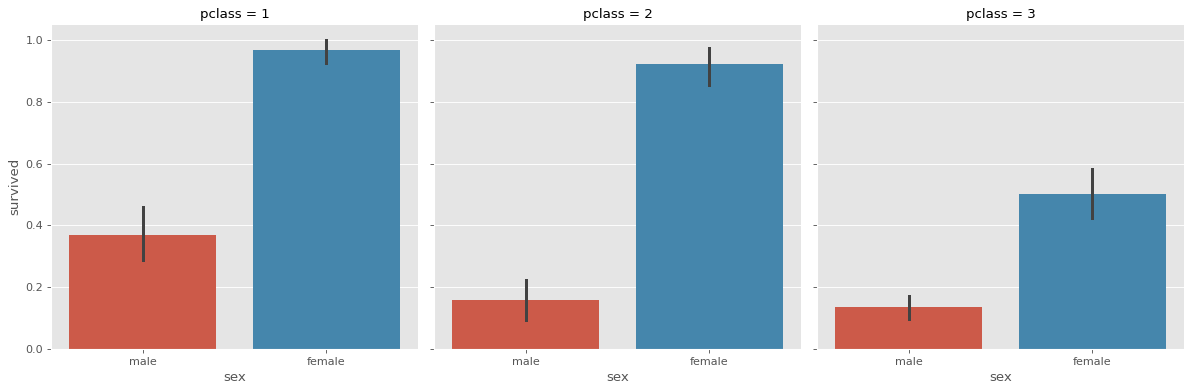

In [160]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')

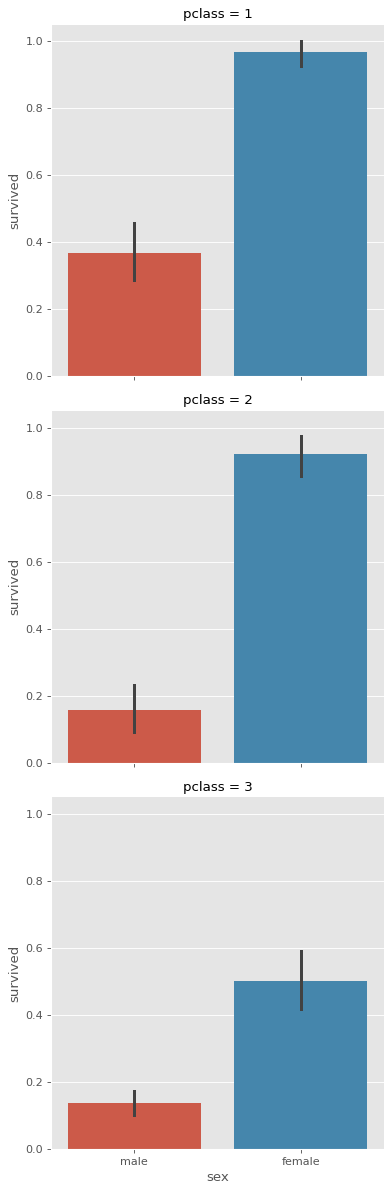

In [161]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, row = 'pclass')

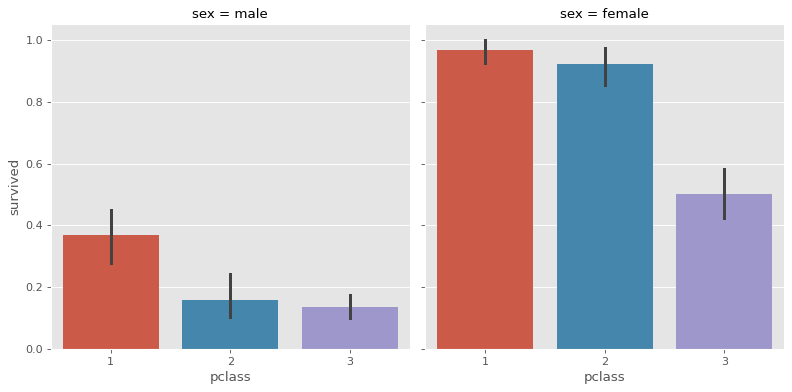

In [162]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

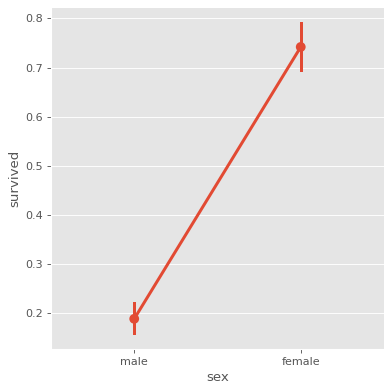

In [163]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic)

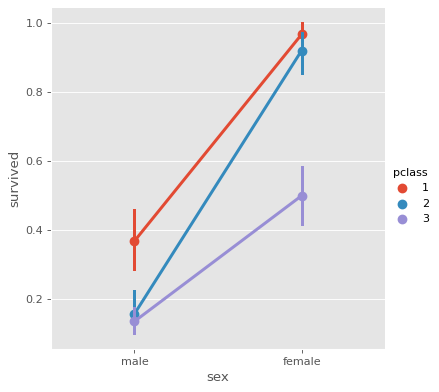

In [164]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic, hue = 'pclass')

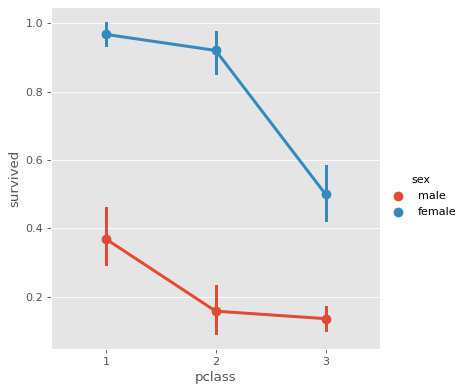

In [165]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic, hue = 'sex')

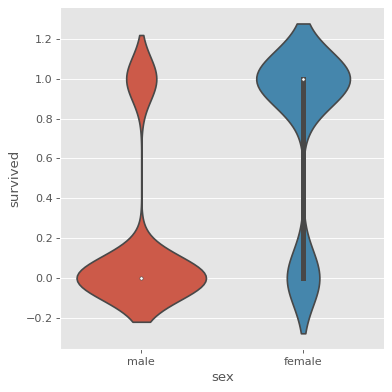

In [166]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic)

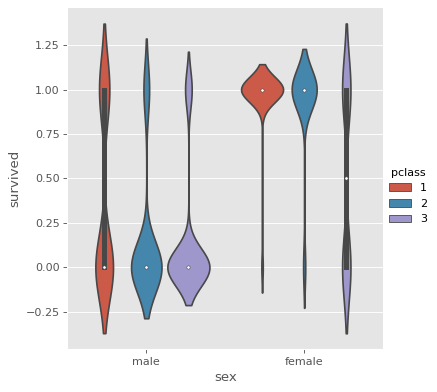

In [167]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, hue = 'pclass')

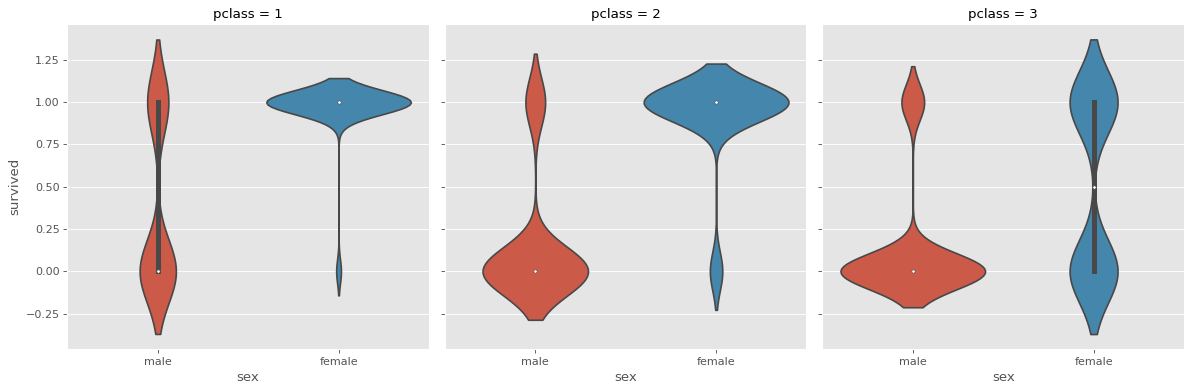

In [168]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, col = 'pclass')

# Age

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

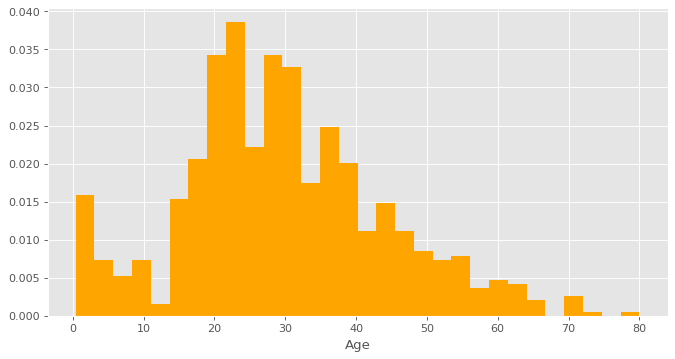

In [169]:
titanic['age'].hist(bins = 30, density = True, color = 'orange', figsize = (10, 5))
plt.xlabel('Age')
plt.show()

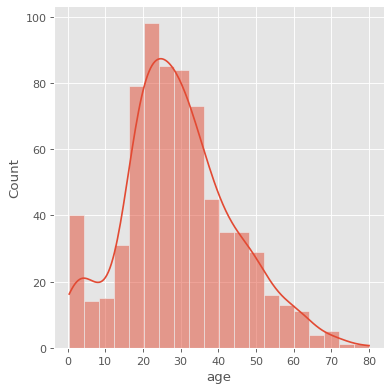

In [170]:
sns.displot(data = titanic,x = 'age', kde = True)

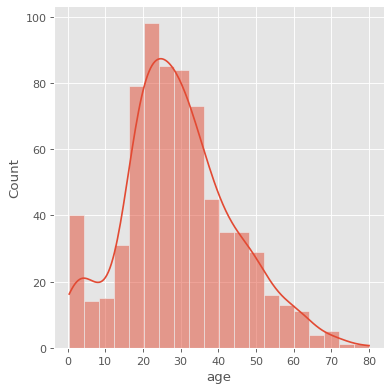

In [171]:
sns.displot(data = titanic, x = 'age', kde = True)

<AxesSubplot: xlabel='age', ylabel='Density'>

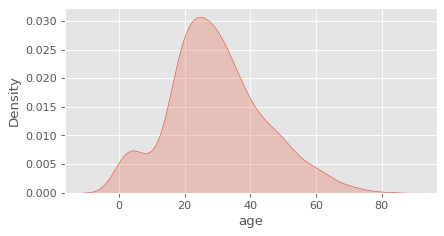

In [172]:
sns.kdeplot(titanic['age'], fill = True)

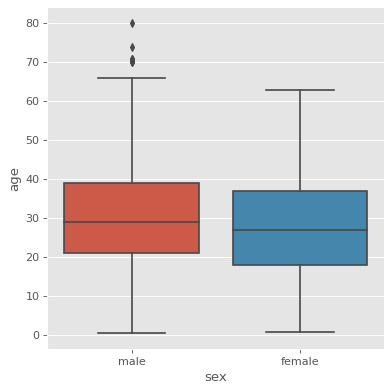

In [173]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box')

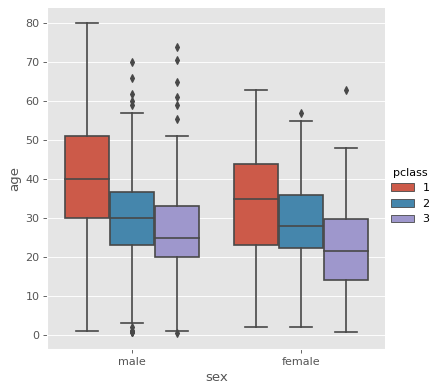

In [174]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', hue = 'pclass')

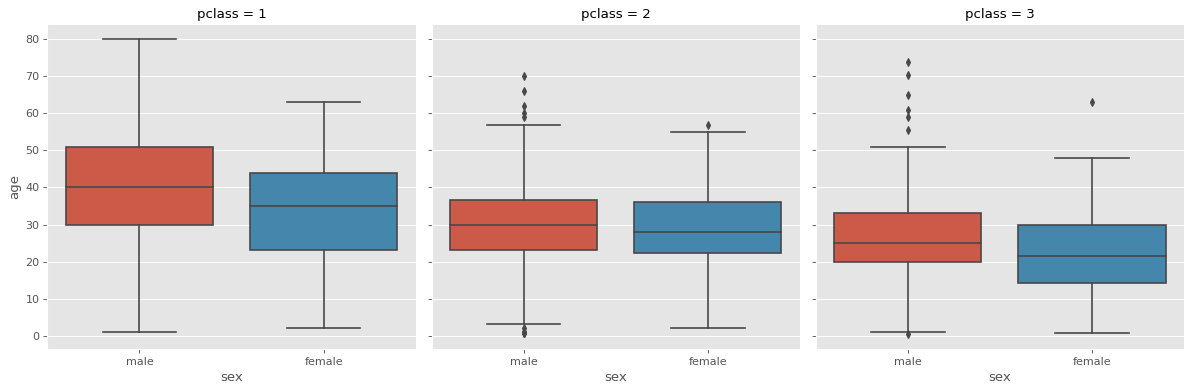

In [175]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', col = 'pclass')

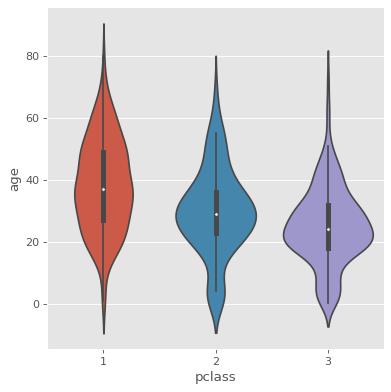

In [176]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin')

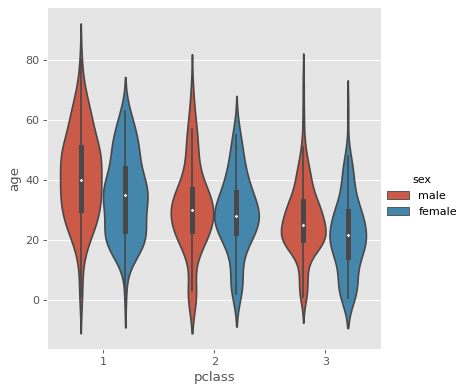

In [177]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', hue = 'sex')

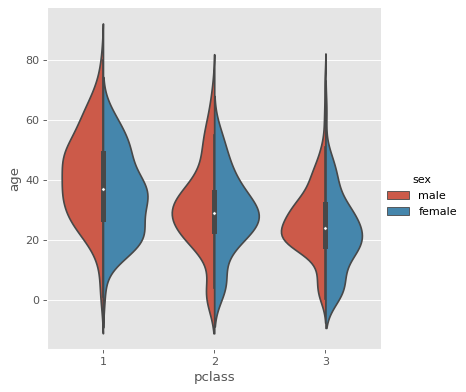

In [178]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', hue = 'sex', split = True)

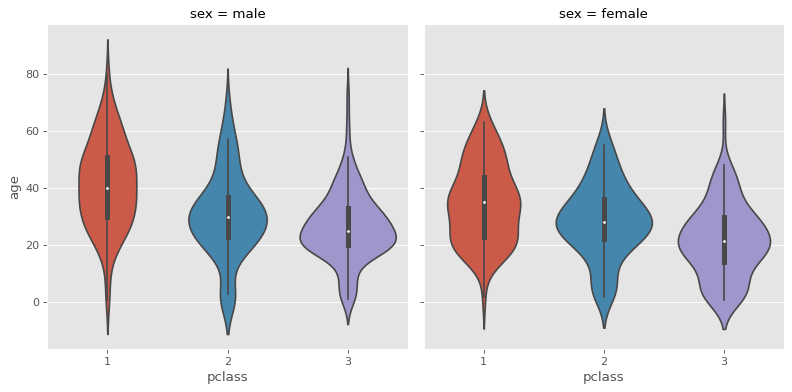

In [179]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', col = 'sex')

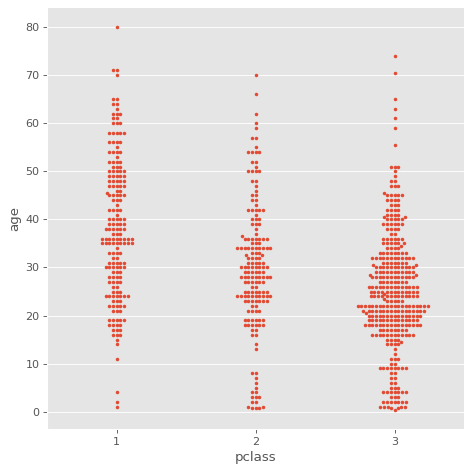

In [180]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, s = 10, height = 6)

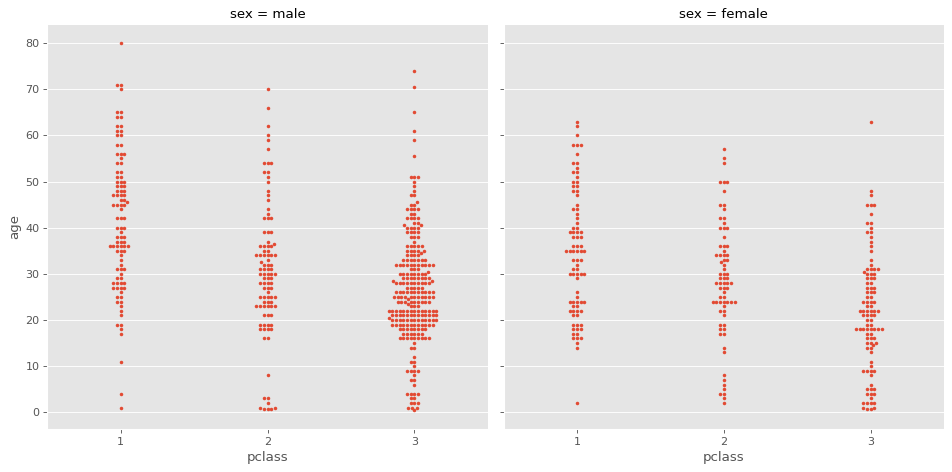

In [181]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, col = 'sex',s = 10, height = 6)

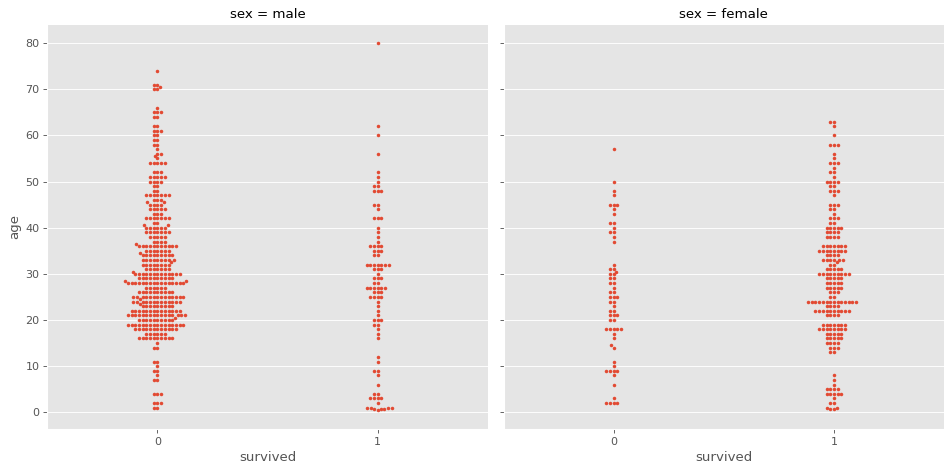

In [182]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'sex',s = 10, height = 6)

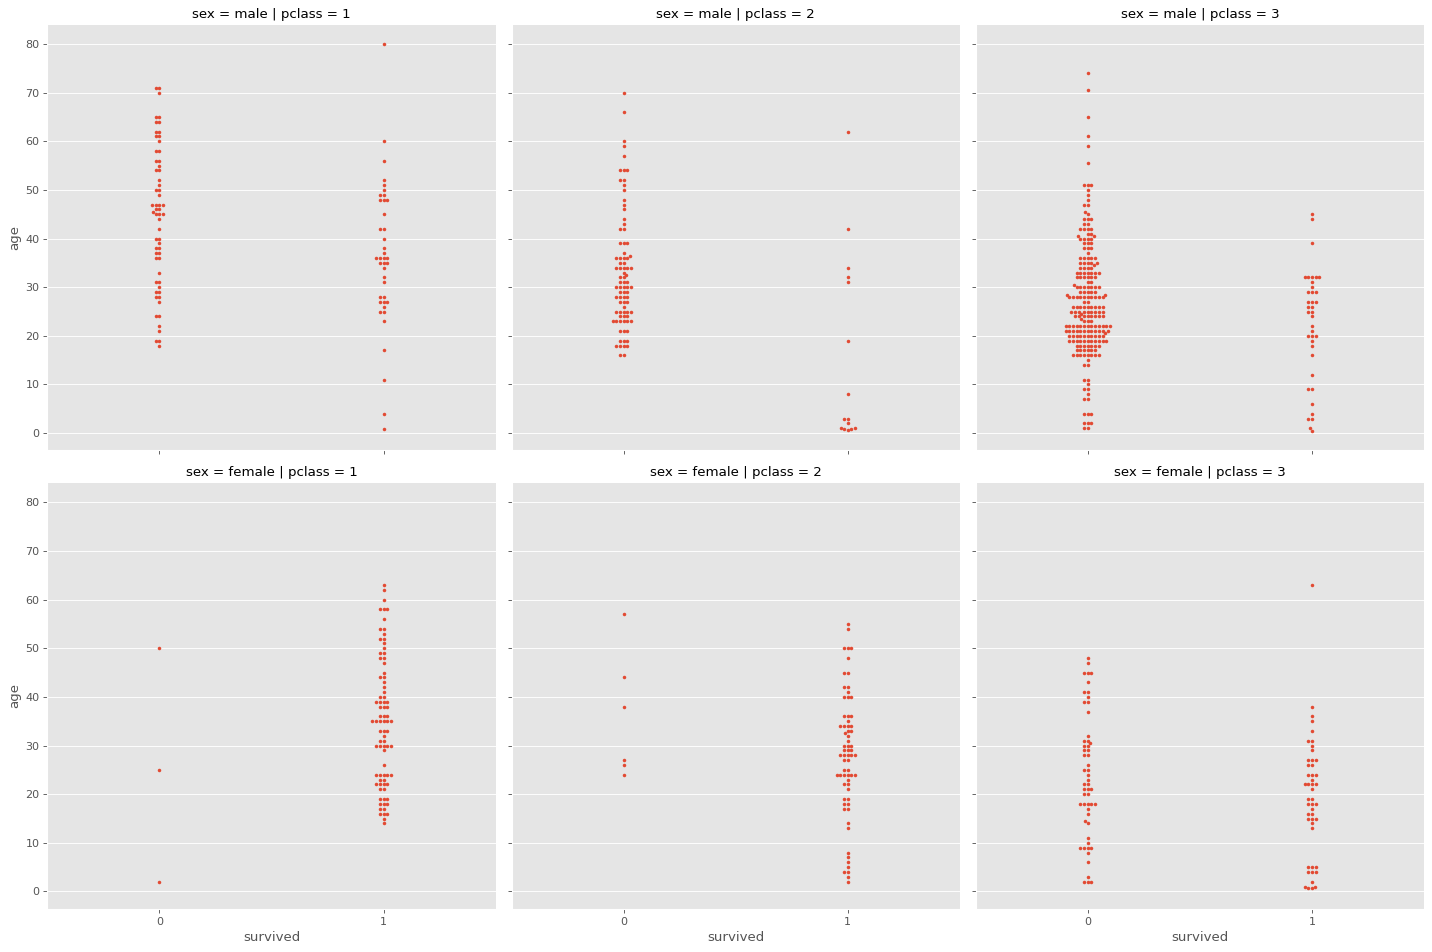

In [183]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', row = 'sex', col = 'pclass',s = 10, height = 6)

# Fare

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<AxesSubplot: >

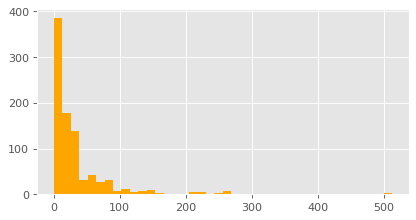

In [184]:
titanic['fare'].hist(bins = 40, color = 'orange')

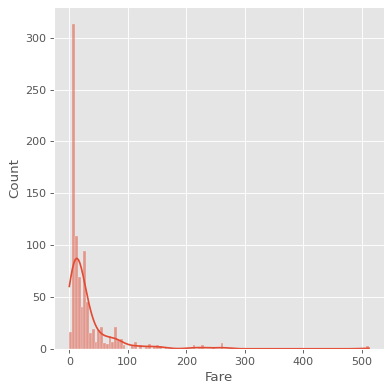

In [185]:
sns.displot(data = titanic, x = 'fare', kde = True)
plt.xlabel('Fare')
plt.show()

<AxesSubplot: xlabel='fare', ylabel='Density'>

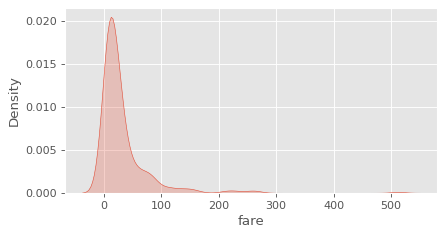

In [186]:
sns.kdeplot(titanic['fare'], fill = True)

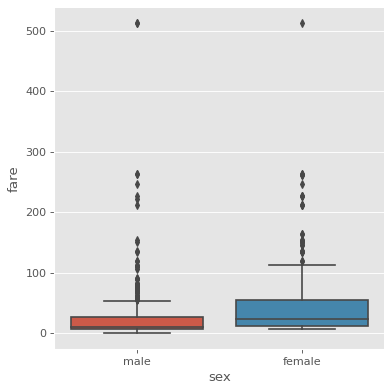

In [187]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box')

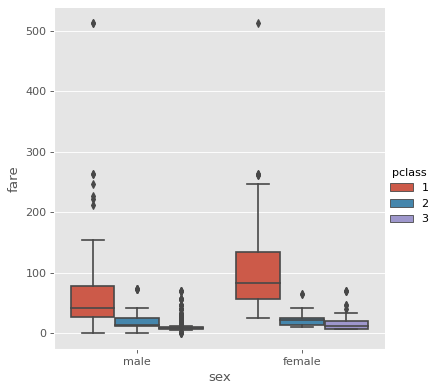

In [188]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', hue = 'pclass')

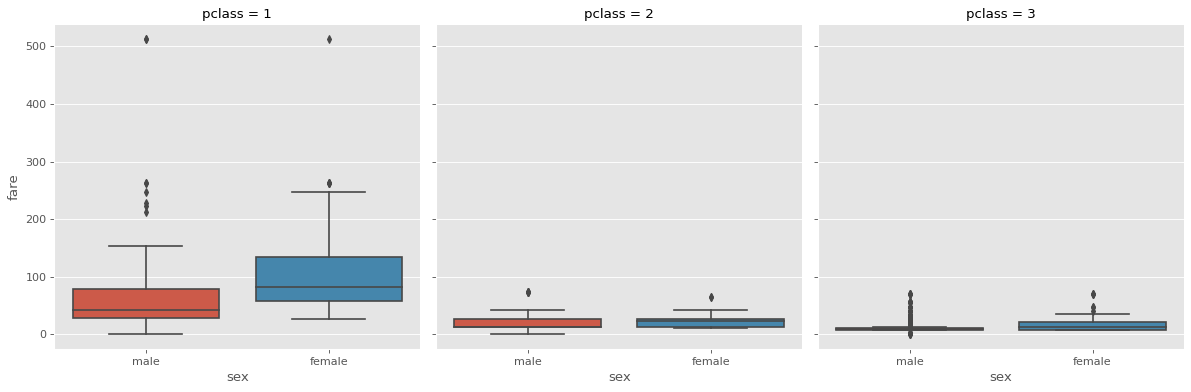

In [189]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', col = 'pclass')

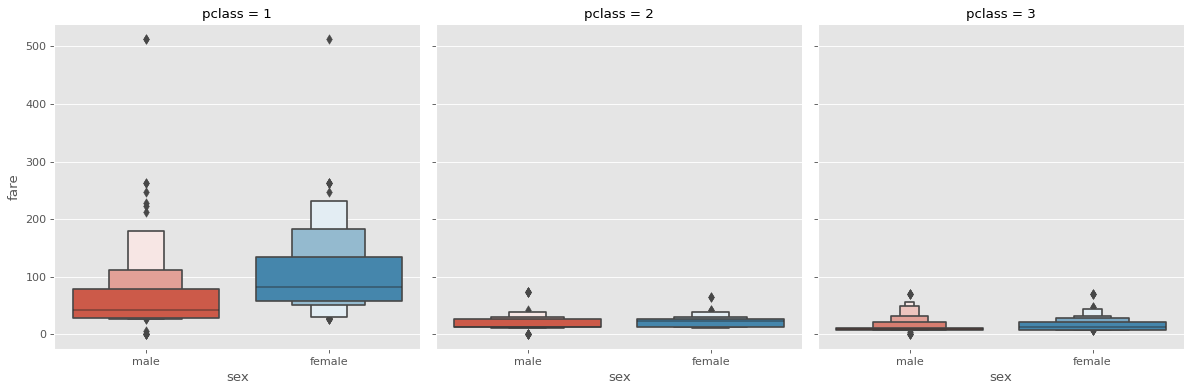

In [190]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'boxen', col = 'pclass')

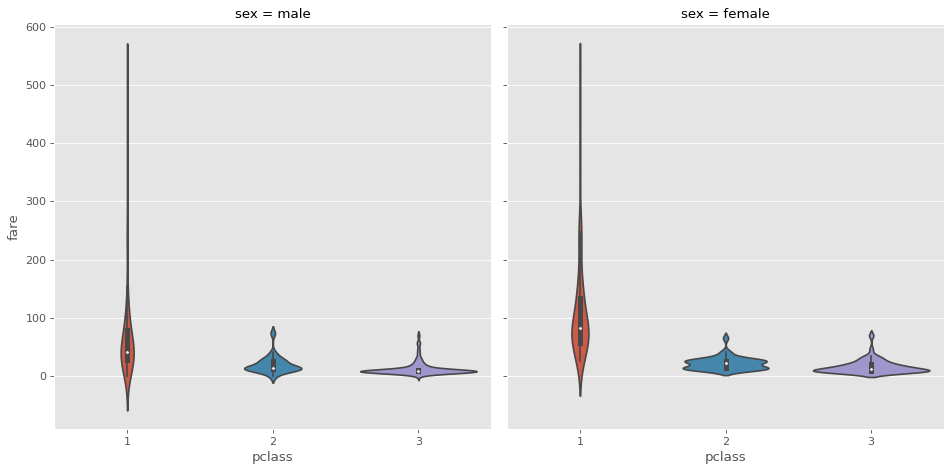

In [191]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'violin', col = 'sex',s = 12, height = 6)

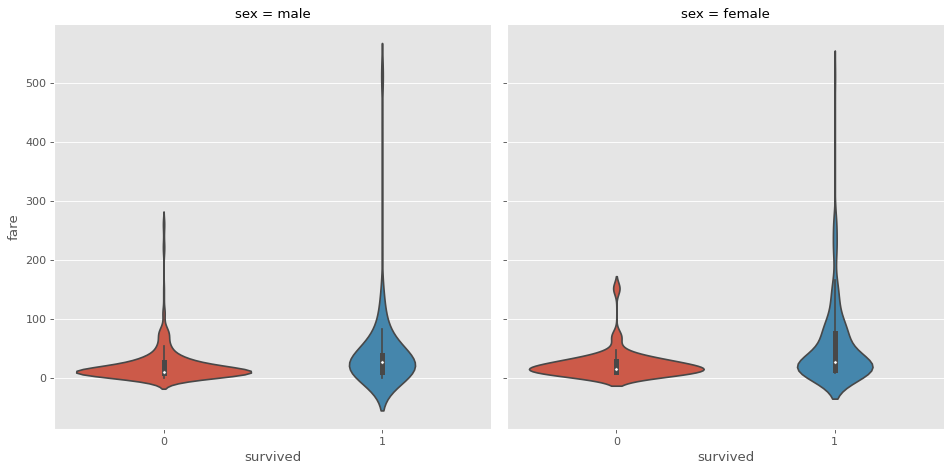

In [192]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'violin', col = 'sex',s = 12, height = 6)

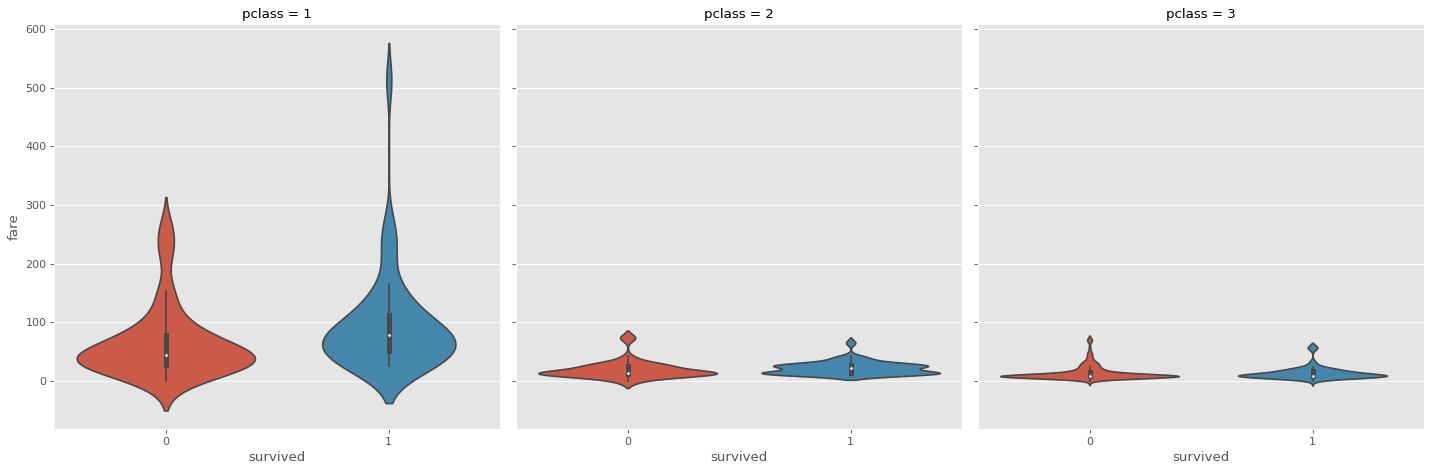

In [193]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'violin', col = 'pclass',s = 12, height = 6,  alpha = 0.5)

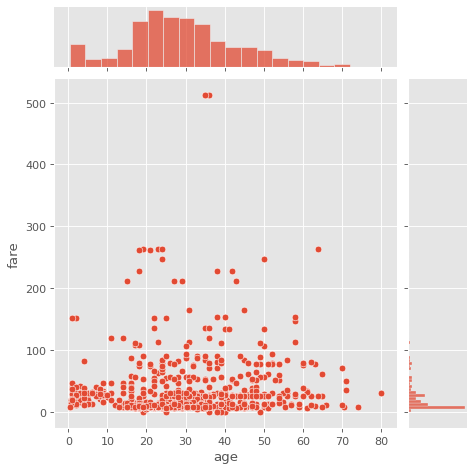

In [194]:
sns.jointplot(x = 'age', y = 'fare', data = titanic)

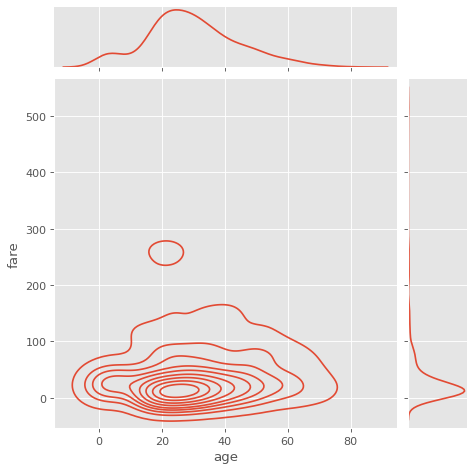

In [195]:
sns.jointplot(x = 'age', y = 'fare', data = titanic, kind = 'kde')

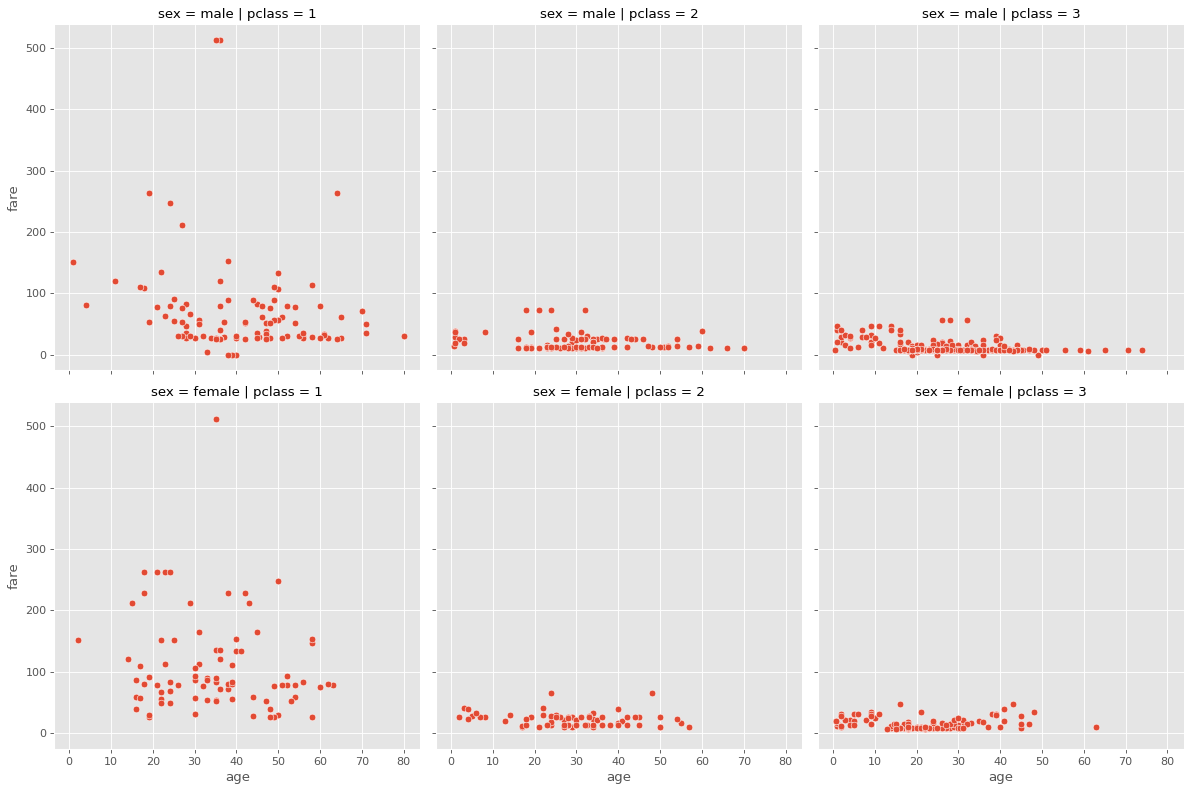

In [196]:
sns.relplot(x = 'age', y = 'fare', data = titanic, row = 'sex', col = 'pclass')

# SibSp

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [197]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot: xlabel='sibsp', ylabel='count'>

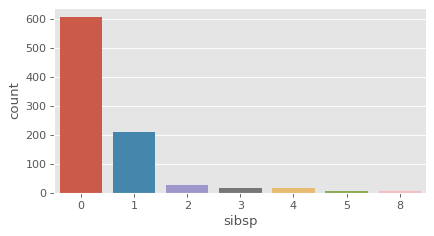

In [198]:
sns.countplot(x = 'sibsp', data = titanic)

<AxesSubplot: xlabel='sibsp', ylabel='count'>

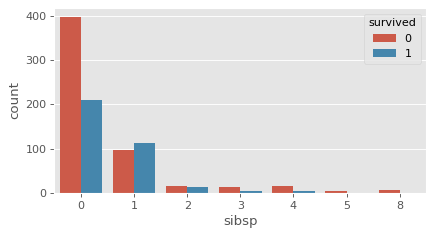

In [199]:
sns.countplot(x = 'sibsp', data = titanic, hue = 'survived')

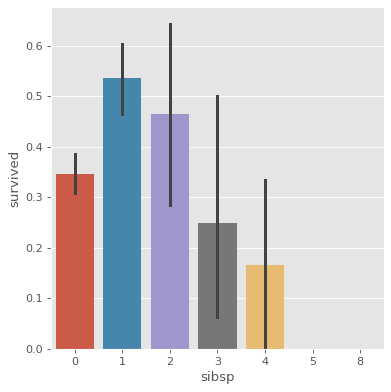

In [200]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic)

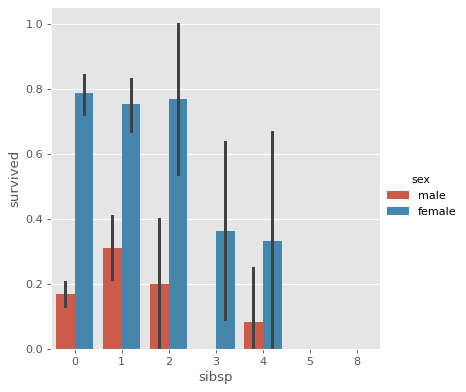

In [201]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, hue = 'sex')

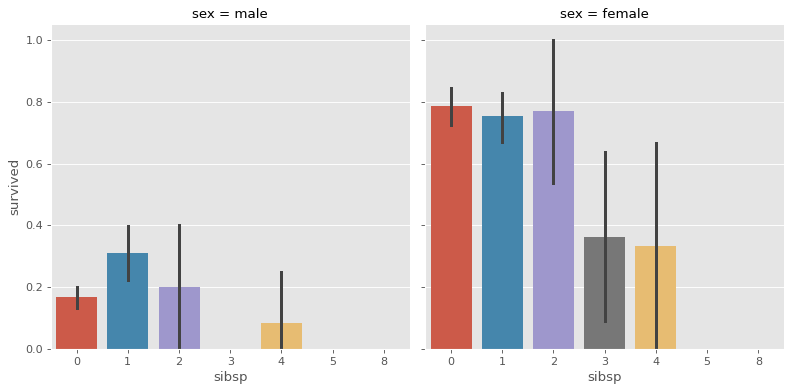

In [202]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

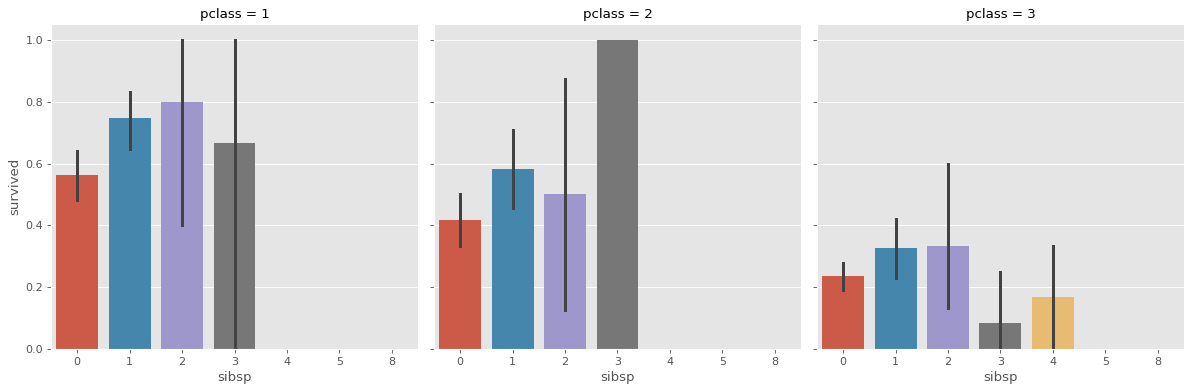

In [203]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')

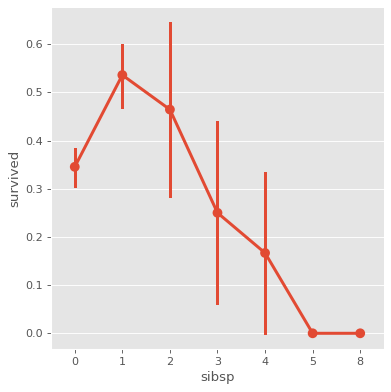

In [204]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic)

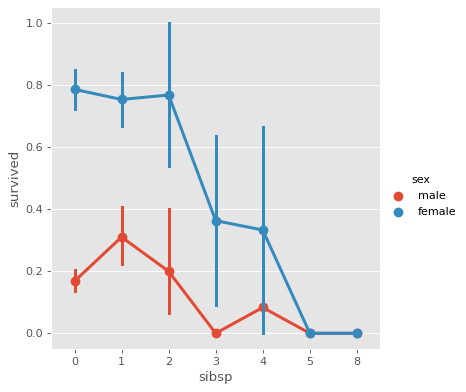

In [205]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic, hue = 'sex')

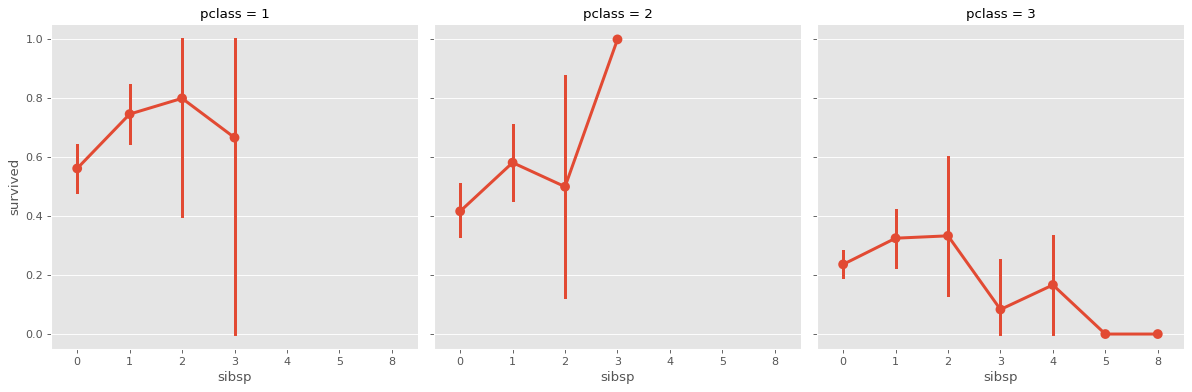

In [206]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic, col = 'pclass')

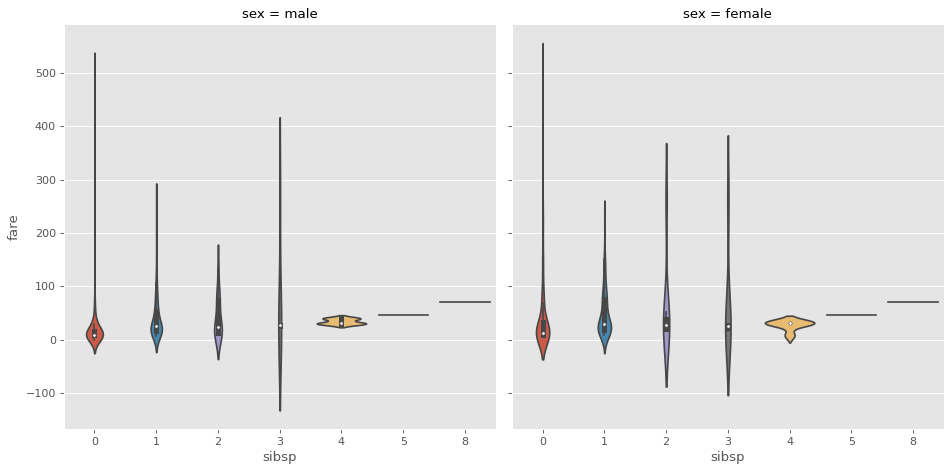

In [207]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'violin', col = 'sex',s = 10, height = 6)

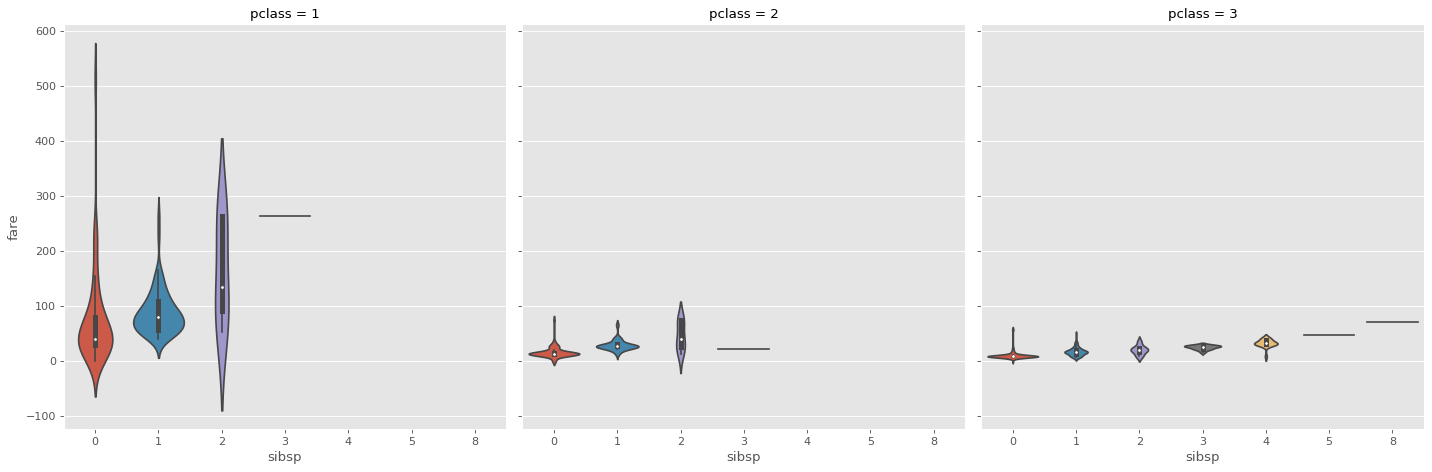

In [208]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'violin', col = 'pclass',s = 10, height = 6)

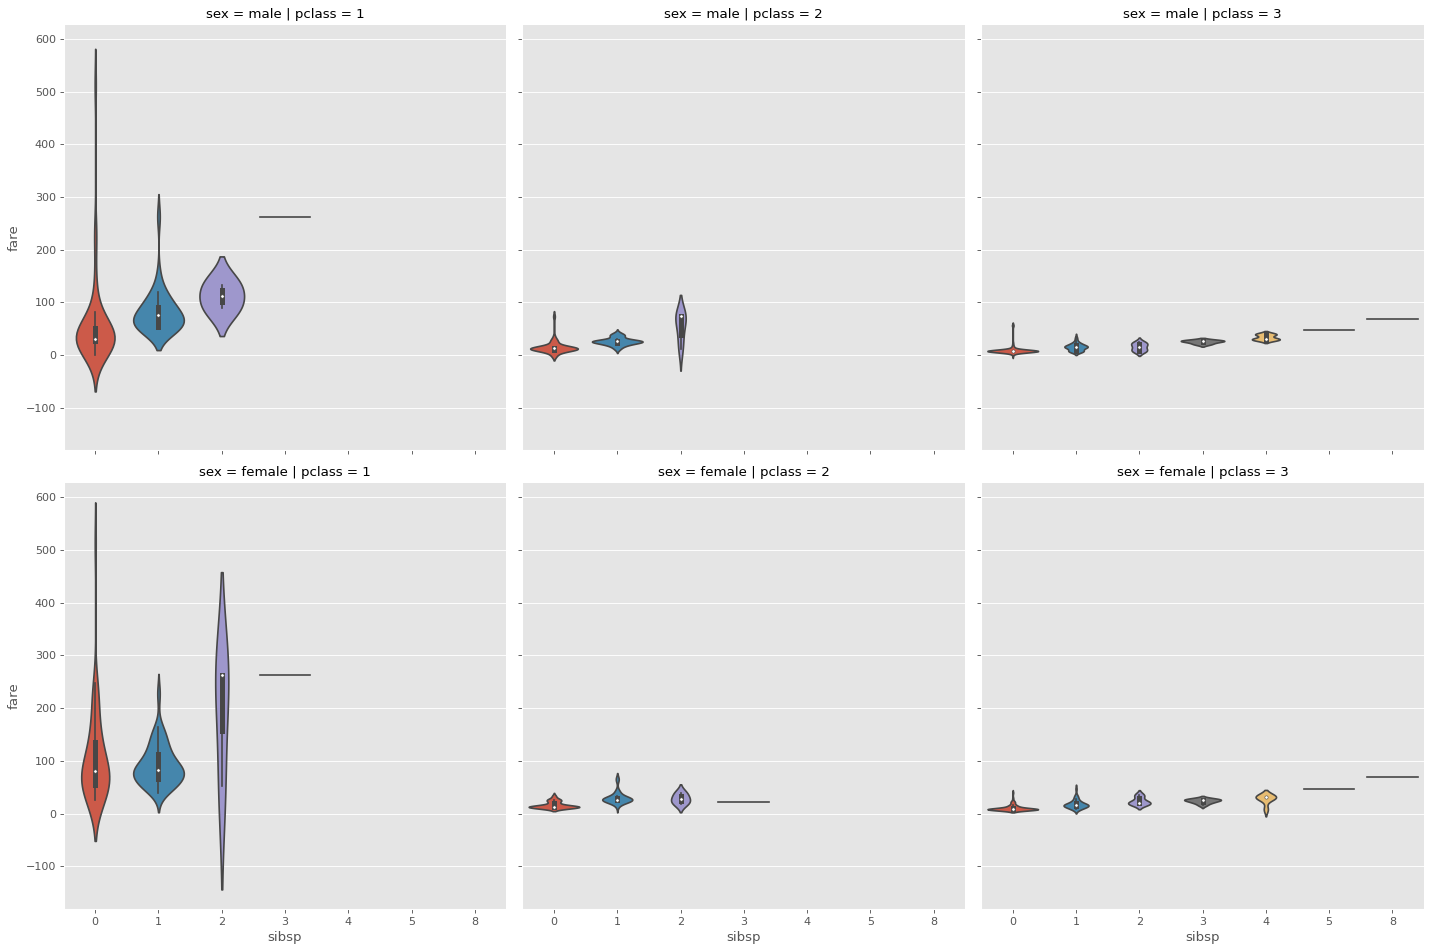

In [209]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'violin', col = 'pclass', row = 'sex',s = 10, height = 6)

# Parch 

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [210]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot: xlabel='parch', ylabel='count'>

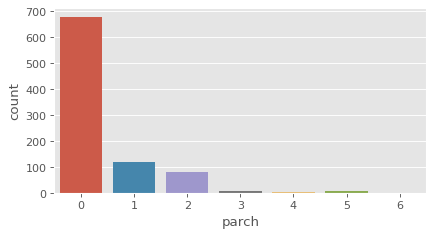

In [211]:
sns.countplot(x = 'parch', data = titanic)

<AxesSubplot: xlabel='parch', ylabel='count'>

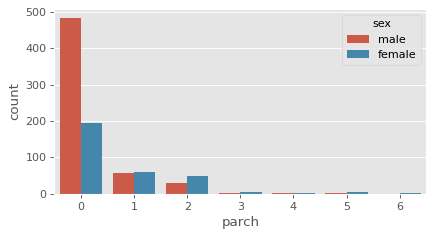

In [212]:
sns.countplot(x = 'parch', data = titanic, hue = 'sex')

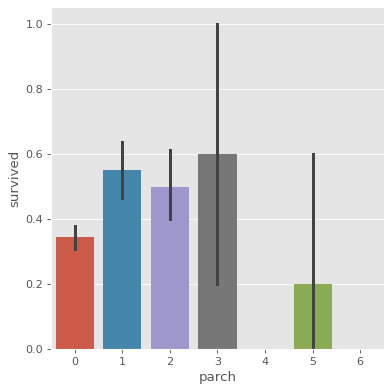

In [213]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar')

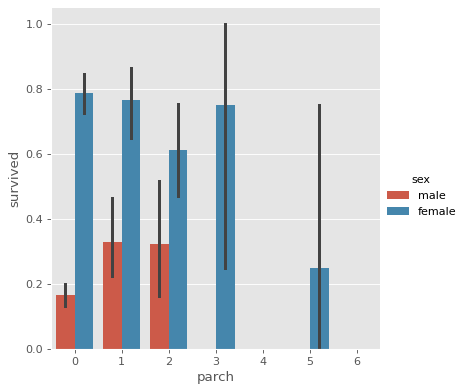

In [214]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar', hue = 'sex')

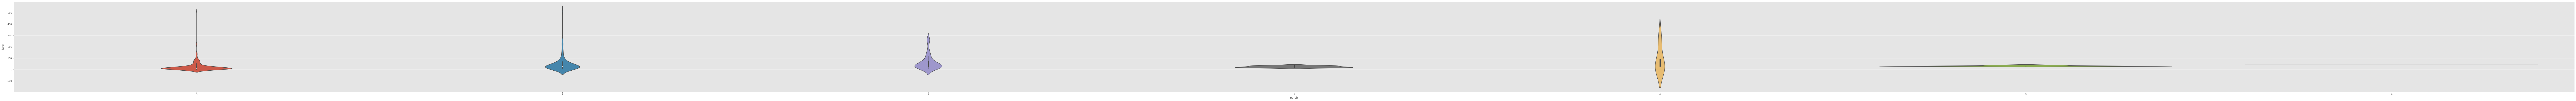

In [215]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'violin',s = 10, height = 6,aspect = 25)

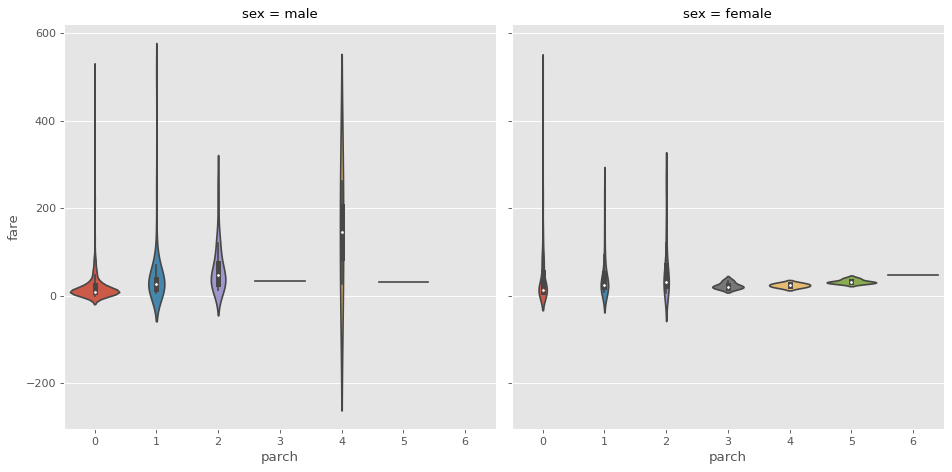

In [216]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'violin', col = 'sex',s = 10, height = 6)

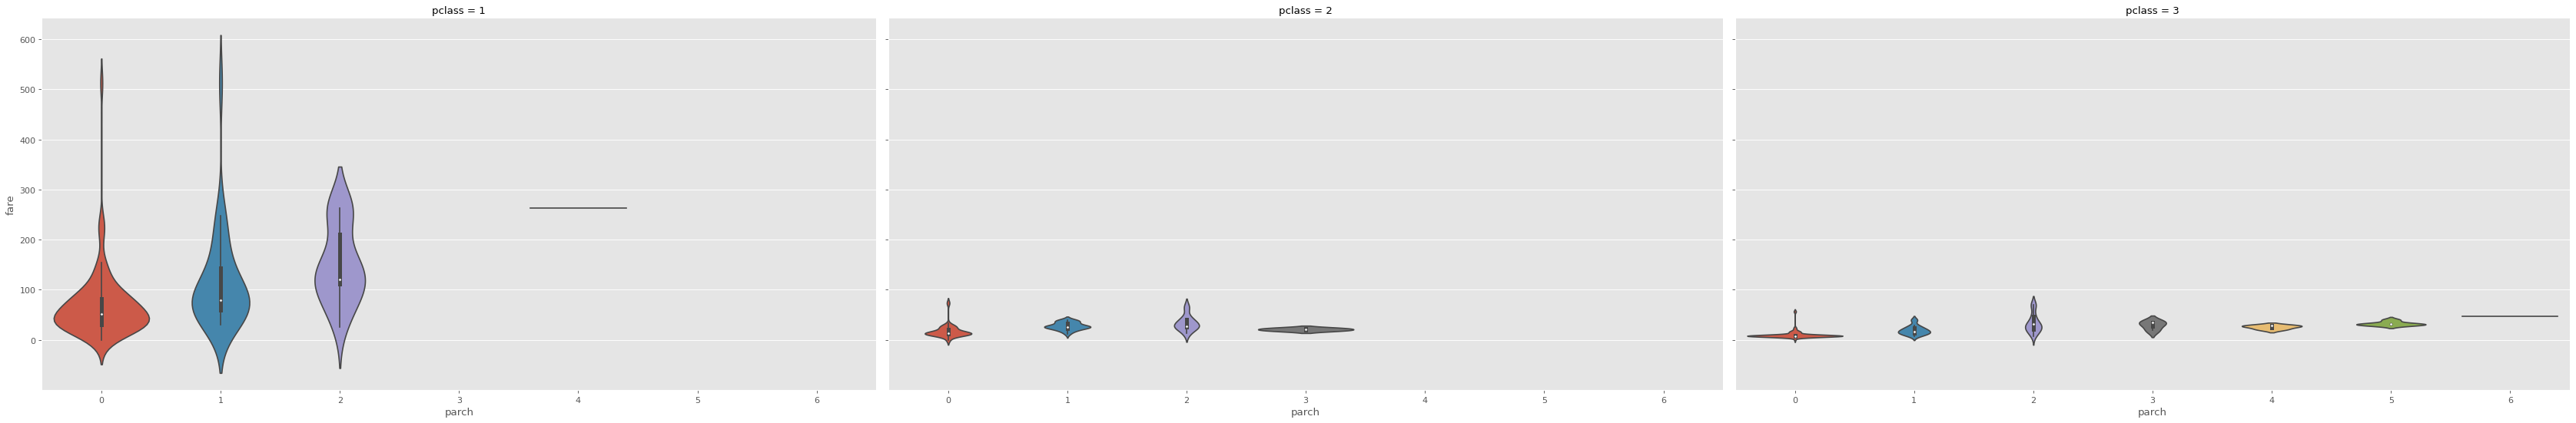

In [217]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'violin', col = 'pclass',s = 10, height = 7,aspect = 2)

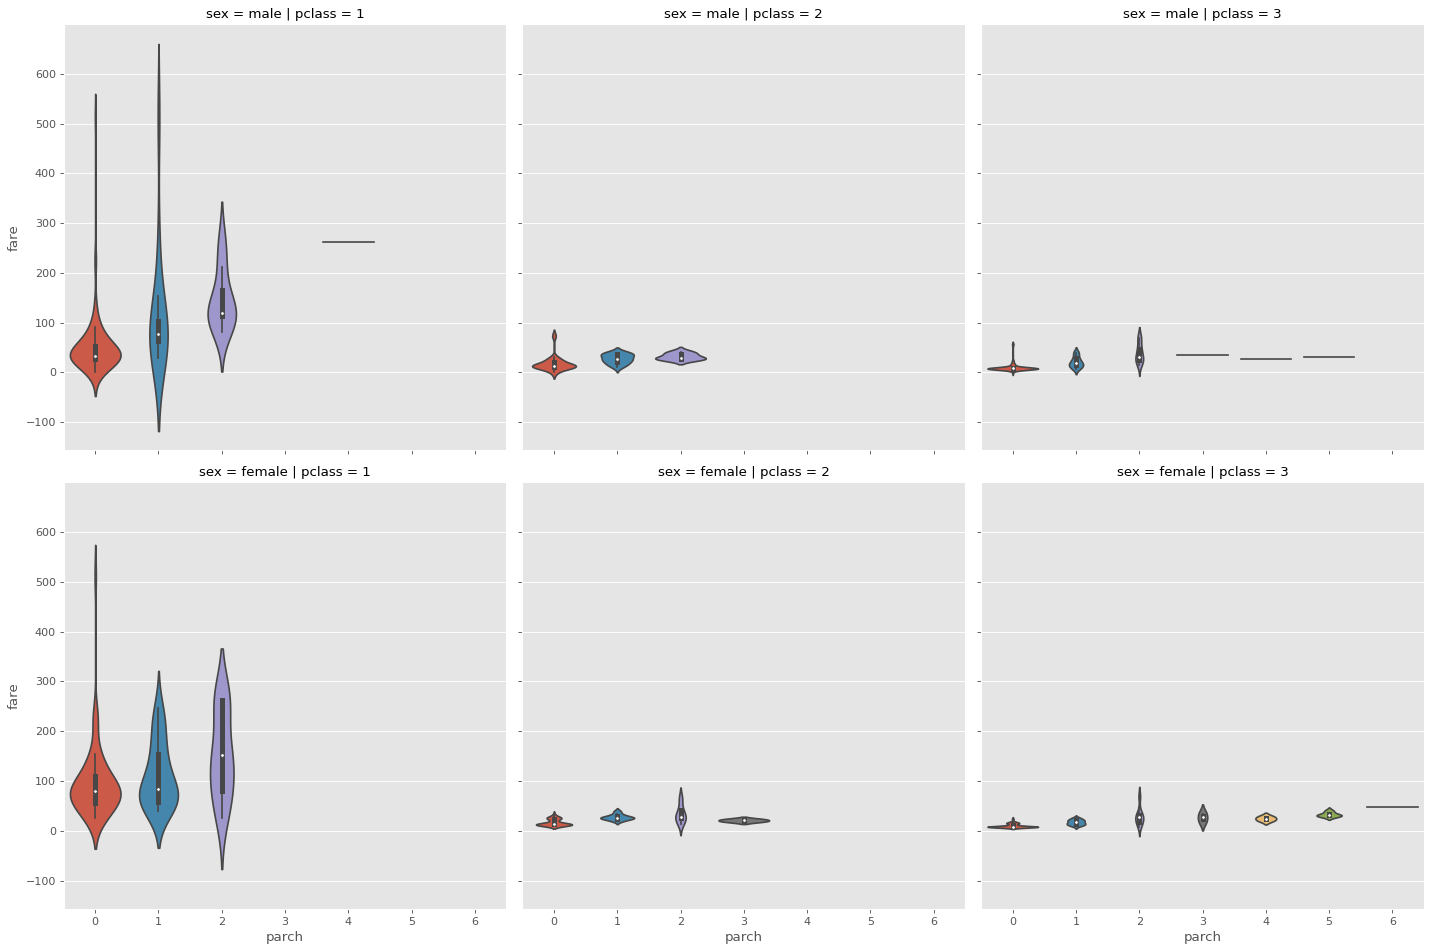

In [218]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'violin', col = 'pclass', row = 'sex',s = 10, height = 6)

# Embarked 

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [219]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot: xlabel='embarked', ylabel='count'>

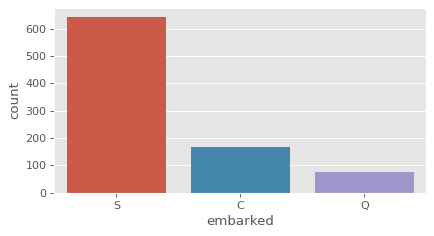

In [220]:
sns.countplot(x = 'embarked', data = titanic)

<AxesSubplot: xlabel='embarked', ylabel='count'>

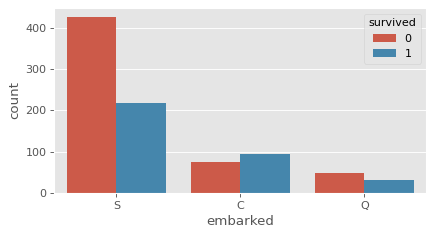

In [221]:
sns.countplot(x = 'embarked', data = titanic, hue = 'survived')

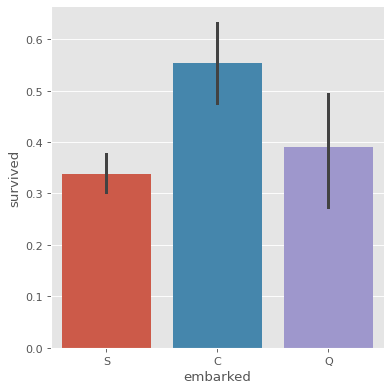

In [222]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic)

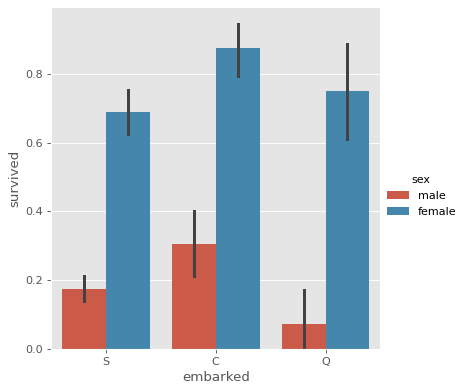

In [223]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, hue = 'sex')

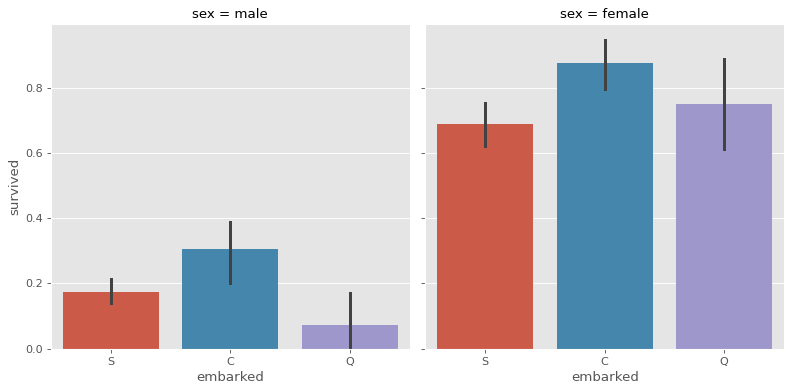

In [224]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

# Who

In [225]:
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [226]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

<AxesSubplot: xlabel='who', ylabel='count'>

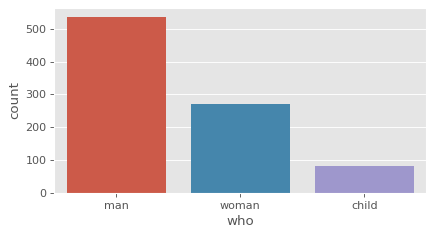

In [227]:
sns.countplot(x = 'who', data = titanic)

<AxesSubplot: xlabel='who', ylabel='count'>

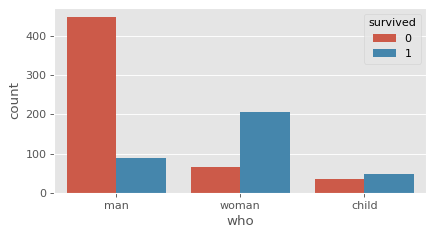

In [228]:
sns.countplot(x = 'who', data = titanic, hue = 'survived')

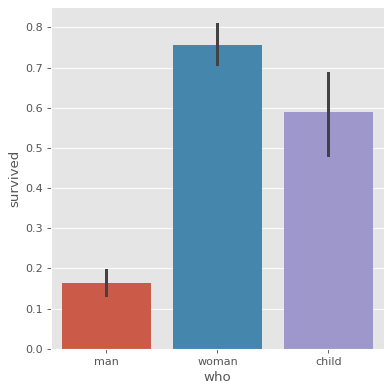

In [229]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic)

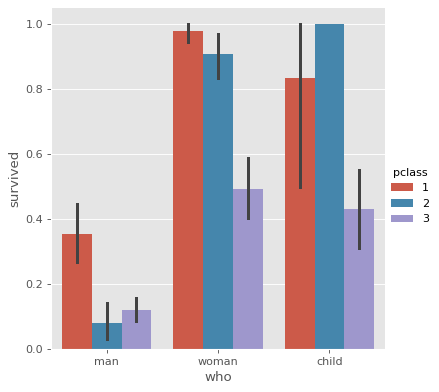

In [230]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')

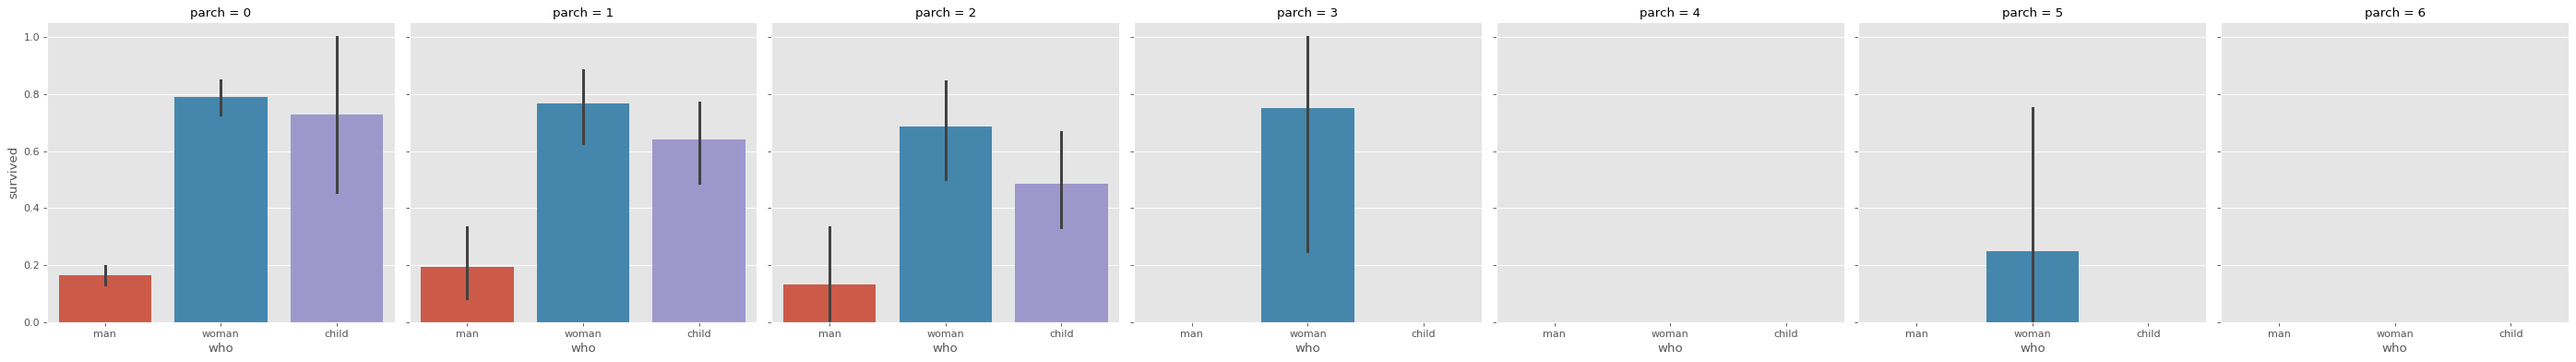

In [231]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, col = 'parch')

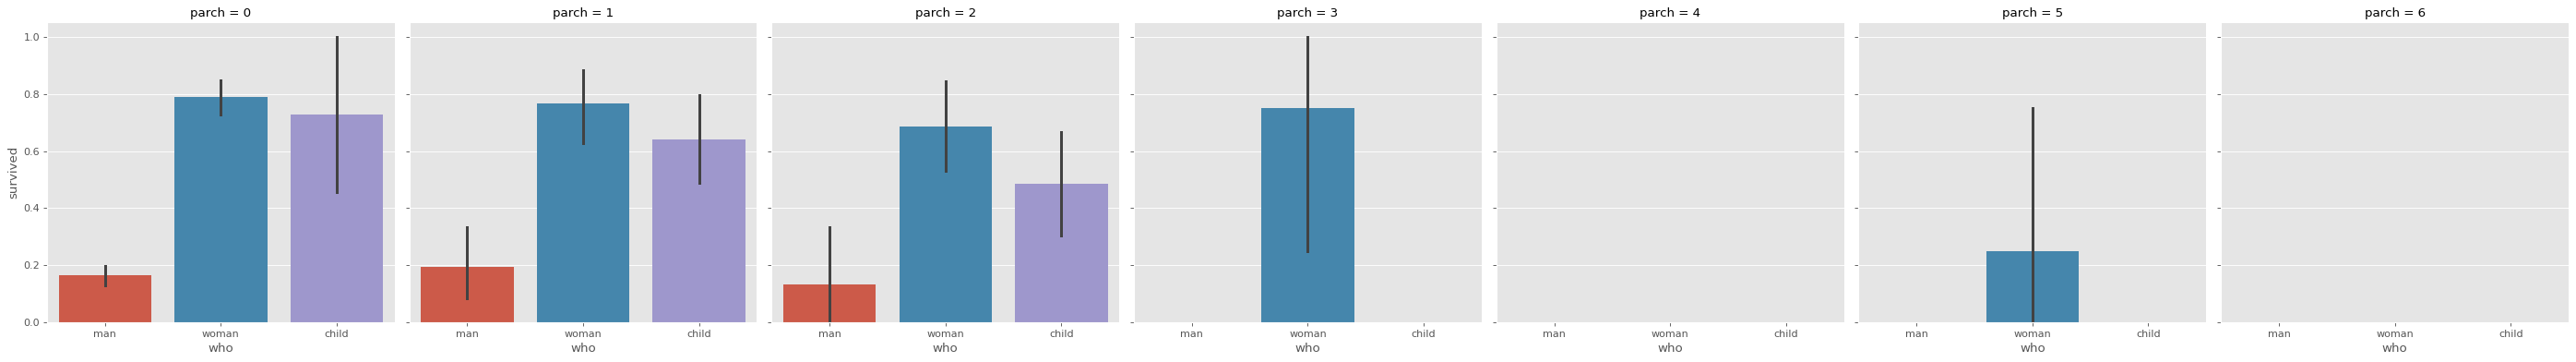

In [232]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, col = 'parch' )